In [4]:
import geoopt
import torch

## Define Manifolds

In [5]:
manifold_p = geoopt.PoincareBall(c=1.0)
manifold_l = geoopt.Lorentz(k=1.0)


### Project on Lorentz manifold

### Take a Random Matrix

In [18]:
desired_variance = 1.0
std = desired_variance ** 0.5
x = torch.randn(100, 1000).double() * std

zeros = torch.zeros(100, x.size(1)) # [N, D-1]
x = zeros
x[:, 3:5] = 1.0 
x = x.double()

In [19]:
manifold = manifold_l

zeros = torch.zeros(100, x.size(1)-1) # [N, D-1]
ones = torch.ones(100, 1) # [N, 1]
origin = torch.cat([ones, zeros], dim=-1) # [N, D]
x_T0 = manifold.proju(origin, x)
print("Projected x onto T0 using manifold.proju:", x_T0)

x = manifold.projx(manifold.expmap(origin, x_T0))
print("Point on manifold after expmap:", x)
print(manifold.check_point_on_manifold(x))

inner = manifold.inner(None, x)
print(inner)

Projected x onto T0 using manifold.proju: tensor([[0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [20]:
x1 = x.unsqueeze(1)
x2 = x.unsqueeze(0)

dist =  manifold.dist(x1, x2).detach().cpu().numpy()

print("Distance matrix:\n", dist)

Distance matrix:
 [[3.16227766e-08 3.16227766e-08 3.16227766e-08 ... 3.16227761e-08
  3.16227761e-08 3.16227761e-08]
 [3.16227766e-08 3.16227766e-08 3.16227766e-08 ... 3.16227761e-08
  3.16227761e-08 3.16227761e-08]
 [3.16227766e-08 3.16227766e-08 3.16227766e-08 ... 3.16227761e-08
  3.16227761e-08 3.16227761e-08]
 ...
 [3.16227761e-08 3.16227761e-08 3.16227761e-08 ... 3.16227752e-08
  3.16227752e-08 3.16227752e-08]
 [3.16227761e-08 3.16227761e-08 3.16227761e-08 ... 3.16227752e-08
  3.16227752e-08 3.16227752e-08]
 [3.16227761e-08 3.16227761e-08 3.16227761e-08 ... 3.16227752e-08
  3.16227752e-08 3.16227752e-08]]


### Project on Poincare manifold

### Take a Random Matrix

In [95]:
desired_variance = 0.5
std = desired_variance ** 0.5
x = torch.randn(100, 2).double() * std



In [96]:
x.max()

tensor(2.1672, dtype=torch.float64)

In [97]:
manifold = manifold_p

origin = torch.zeros(x.size(0), x.size(1)) # [N, D-1]
x_T0 = manifold.proju(origin, x)
print("Projected x onto T0 using manifold.proju:\n", x_T0)

x = manifold.projx(manifold.expmap(origin, x_T0))
print("Point on manifold after expmap:", x)
print(manifold.check_point_on_manifold(x))


Projected x onto T0 using manifold.proju:
 tensor([[ 0.2841, -0.9063],
        [-0.7588,  0.6843],
        [ 0.1773, -1.6405],
        [ 0.1434, -0.4952],
        [ 0.4567, -0.1995],
        [-0.6819, -0.6625],
        [ 0.0890,  0.1619],
        [ 0.2515,  0.4569],
        [-0.1324, -0.5448],
        [-1.1955, -0.4349],
        [ 1.1025, -0.3459],
        [ 0.3557,  0.4372],
        [ 1.4452,  0.6841],
        [-0.2515,  0.6754],
        [ 0.1159, -1.1922],
        [ 0.5372,  0.8337],
        [-0.4162, -0.2841],
        [ 0.4629,  0.8360],
        [-0.6526,  1.1165],
        [ 0.5134,  0.1698],
        [ 0.6725,  0.4263],
        [ 0.6347, -0.7913],
        [ 0.8190,  1.0843],
        [-0.4325, -1.3148],
        [-0.8465,  0.6902],
        [ 0.0571,  0.3472],
        [-0.2464,  0.6739],
        [ 0.6266, -0.4571],
        [-0.5618, -1.1217],
        [-0.2951,  0.8954],
        [ 0.7562,  0.9882],
        [-0.0754, -0.2278],
        [-0.0801, -0.5958],
        [-0.4771,  0.6373],
     

In [98]:
x1 = x.unsqueeze(1)
x2 = x.unsqueeze(0)

dist_one  =  manifold.dist(x[0], x[1]).detach().cpu().numpy()

print("x[0]:", x[0])
print("x[1]:", x[1])
print("x[3]:", x[3])
print("Distance between x[0] and x[1]:", dist_one)



dist = manifold.dist(x1, x2).detach().cpu().numpy()

print("Distance matrix:\n", dist)

x[0]: tensor([ 0.2212, -0.7058], dtype=torch.float64)
x[1]: tensor([-0.5723,  0.5161], dtype=torch.float64)
x[3]: tensor([ 0.1320, -0.4555], dtype=torch.float64)
Distance between x[0] and x[1]: 3.873962959075134
Distance matrix:
 [[0.         3.87396296 1.76264943 ... 2.03117159 3.43112086 3.60925748]
 [3.87396296 0.         5.2101902  ... 2.18086656 3.04400989 2.88861365]
 [1.76264943 5.2101902  0.         ... 3.25016259 4.91082164 4.79694402]
 ...
 [2.03117159 2.18086656 3.25016259 ... 0.         2.56571791 1.58612465]
 [3.43112086 3.04400989 4.91082164 ... 2.56571791 0.         3.92216127]
 [3.60925748 2.88861365 4.79694402 ... 1.58612465 3.92216127 0.        ]]


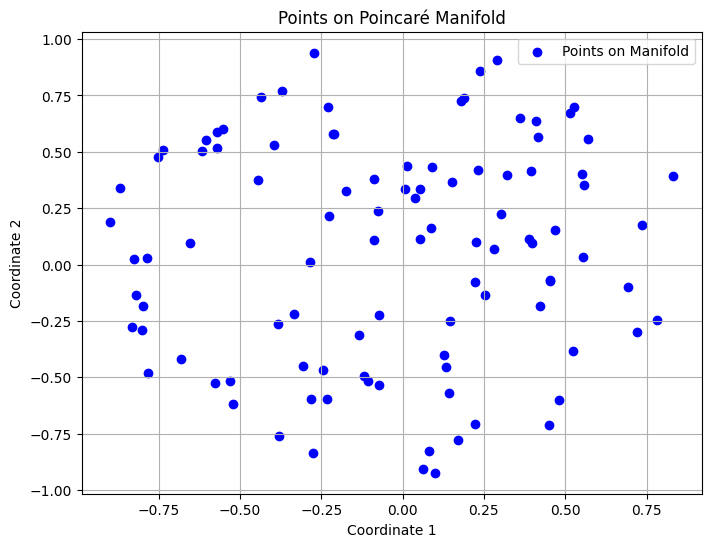

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0].numpy(), x[:, 1].numpy(), c='blue', marker='o', label='Points on Manifold')
plt.title('Points on Poincaré Manifold')
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')
plt.grid()
plt.legend()
plt.show()

# Datasets

In [42]:
import sys
sys.path.append('/home/dionisia/benchmark_evaluation')
from datasets.data_utils import GraphDatasetLoader 

In [49]:
# 1. Load dataset
dataset = "cora"
print(f"Loading {dataset} dataset...")
loader = GraphDatasetLoader(
    dataset_name=dataset
)
dataset = loader.load()
print(f"Type: {type(dataset)}")
if isinstance(dataset, list):
    print(f"Type of first item: {type(dataset[0])}")
    print(f"Data object: {dataset[0]}")
else:
    print("Dataset is a single graph.")
    print(f"Data object: {dataset}")
    # Wrap single graph in a list for uniform processing downstream
    dataset = [dataset]

Loading cora dataset...
Type: <class 'torch_geometric.data.data.Data'>
Dataset is a single graph.
Data object: Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [44]:
manifold = manifold_p

In [45]:
# 3. Project node features to manifold
for data_item in dataset:
    if isinstance(manifold, geoopt.Euclidean):
        data_item.x = data_item.x.double() 
    elif isinstance(manifold, geoopt.Lorentz) or isinstance(manifold, geoopt.PoincareBall):   
        print("Shape before projection",data_item.x.shape)  
        data_item.x = data_item.x.double() # Ensure features are in double precision
        #print("Node feature:", data_item.x)
        if isinstance(manifold, geoopt.Lorentz):
            zeros = torch.zeros(data_item.x.size(0), data_item.x.size(1) - 1, dtype=torch.float64)  # Zero vector for time component
            ones = torch.ones(data_item.x.size(0), 1, dtype=torch.float64)  # One vector for time component
            origin = torch.cat([ones, zeros], dim=1)  # Origin of the space
            tangent_vector = manifold.proju(origin, data_item.x)  # Project features to tangent space at origin
            data_item.x = manifold.projx(manifold.expmap(origin, tangent_vector))  # Projection to manifold
            print(manifold.check_point_on_manifold(data_item.x ))
            print("Shape after projection",data_item.x.shape) 
        elif isinstance(manifold, geoopt.PoincareBall):
            origin = torch.zeros(data_item.x.size(0), data_item.x.size(1), dtype=torch.float64)
            data_item.x = manifold.projx(manifold.expmap(origin, data_item.x))  # Projection to manifold
            print(manifold.check_point_on_manifold(data_item.x ))
            print("Shape after projection",data_item.x.shape) 
            

Shape before projection torch.Size([3188, 4])
True
Shape after projection torch.Size([3188, 4])


In [46]:
torch.set_printoptions(threshold=float('inf'))


In [47]:
x1 = dataset[0].x.unsqueeze(1)
x2 = dataset[0].x.unsqueeze(0)

dist =  manifold.dist(x1, x2).detach().cpu().numpy()

print("Distance matrix:\n", dist)

Distance matrix:
 [[0.         0.67480184 1.30394079 ... 3.02619733 3.00883453 3.98761287]
 [0.67480184 0.         0.93868515 ... 3.25278342 3.2351305  4.02302683]
 [1.30394079 0.93868515 0.         ... 3.15579229 3.13858928 3.67266292]
 ...
 [3.02619733 3.25278342 3.15579229 ... 0.         0.04856794 3.43095034]
 [3.00883453 3.2351305  3.13858928 ... 0.04856794 0.         3.42029608]
 [3.98761287 4.02302683 3.67266292 ... 3.43095034 3.42029608 0.        ]]
